In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving aspiring_minds_employability_outcomes_2015.csv to aspiring_minds_employability_outcomes_2015.csv


**Data Description**
The dataset is released by aspiring minds employability outcomes 2015 (AMEO). It mainly focuses on engineering students employability and their factors for getting a job. The dataset contains around 40 independent varibales and 4000 points. The dataset consists of unique id which segreagates the students details. The independent variables are both continuous and categorical in nature.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
import statsmodels.graphics.gofplots as sm
import plotly.express as px
import random
import statistics
from scipy.stats import norm

In [ ]:
df=pd.read_csv("aspiring_minds_employability_outcomes_2015.csv")
df.head(8)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.40,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.00,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.60,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.00,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,train,1027655,300000.0,6/1/2014 0:00,present,system engineer,Hyderabad,m,7/2/1992 0:00,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,train,947847,300000.0,8/1/2014 0:00,5/1/2015 0:00,java software engineer,Banglore,m,2/1/1993 0:00,86.08,state board,2010,67.5,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,train,912934,400000.0,7/1/2014 0:00,7/1/2015 0:00,mechanical engineer,Bangalore,m,5/27/1992 0:00,92.00,cbse,2010,91.0,cbse,1757,1,B.Tech/B.E.,mechanical engineering,8.58,1757,0,Tamil Nadu,2016,545,555,590,0.829585,-1,-1,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470


In [ ]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [ ]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,0.027539,0.135505,0.102215,-0.055134,-0.125639,0.018859,-0.115601,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,-0.010053,0.178219,0.179275,0.230627,0.104656,0.115665,0.000665,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,-0.013799,0.350780,0.316014,0.317640,0.078563,0.053600,0.085179,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,0.014457,0.147925,0.105887,0.001379,-0.034163,-0.047995,-0.005891,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,-0.012933,0.212888,0.243571,0.312413,0.074099,0.080818,0.117112,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,-0.000172,-0.022792,-0.047094,-0.114672,-0.073857,-0.033760,-0.020438,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,-0.005557,-0.183843,-0.182811,-0.251103,-0.061436,-0.073644,-0.031573,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,0.008706,0.106478,0.196610,0.217380,0.107252,0.136596,0.029855,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,-0.000172,-0.022792,-0.047094,-0.114672,-0.073857,-0.033760,-0.020438,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,0.008152,0.050462,0.020353,0.007896,0.009250,0.064272,0.041083,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


In [ ]:
#deopping the unnamed column from the dataset
df1 = df.drop('Unnamed: 0', axis=1)
df1

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,10/1/2011 0:00,10/1/2012 0:00,software engineer,New Delhi,m,4/15/1987 0:00,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,7/1/2013 0:00,7/1/2013 0:00,technical writer,Hyderabad,f,8/27/1992 0:00,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,7/1/2013 0:00,present,associate software engineer,Bangalore,m,7/3/1991 0:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,7/1/2014 0:00,1/1/2015 0:00,software developer,Asifabadbanglore,f,3/20/1992 0:00,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [ ]:
print("The shape of the dataset is:", df1.shape)
print("\n")
print(df1.info())

The shape of the dataset is: (3998, 38)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier   

In [ ]:
#for finding the missing values in the given dataset
df1.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

### **Univariant Analysis**

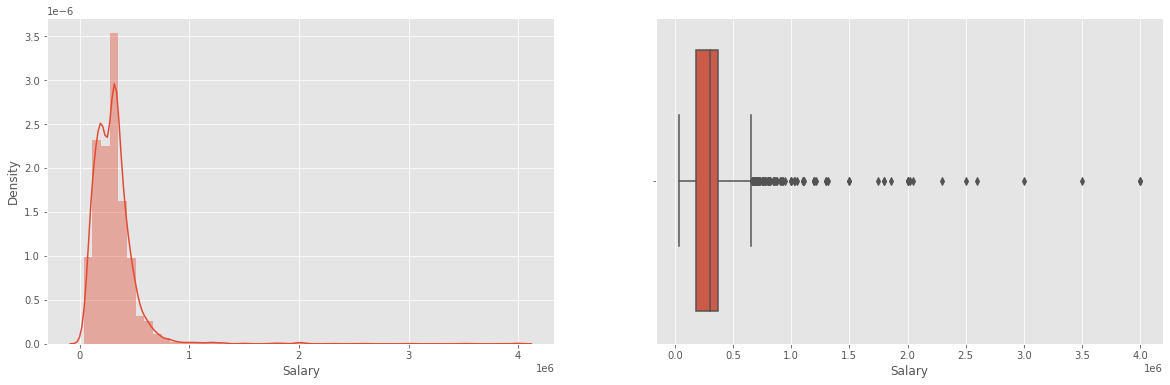

In [ ]:
def visualize(feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.distplot(feature,kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(feature)


visualize(df1.Salary)

**observations**
we can conclude that the *outliers* are present in the **upper limit** by observing boxplot and by observing the *median* is located around **300000.0** can be assumed by observing displot it can be verified by later on

In [ ]:
#defining an outliner function for finding out the outliers in the given dataset
def outlier(feature):
  Q1 = feature.quantile(0.25)

  Q3 = feature.quantile(0.75)

  IQR = Q3 - Q1

  Lower_quantile = Q1 - (1.5 * IQR)

  Upper_quantile = Q3 + (1.5 * IQR)

  outliner =[]
  for x in feature:
      if ((x> Upper_quantile) or (x<Lower_quantile)):
          outliner.append(x)
  print(' outliers for given column  are:', outliner)
print(outlier(df1.Salary)) #####These are the outliners for the salary feature. 
print(df1.Salary.median())

 outliers for given column  are: [1100000.0, 800000.0, 1500000.0, 1200000.0, 675000.0, 1860000.0, 660000.0, 700000.0, 785000.0, 700000.0, 690000.0, 700000.0, 1110000.0, 1200000.0, 1000000.0, 715000.0, 820000.0, 720000.0, 2600000.0, 715000.0, 800000.0, 1025000.0, 775000.0, 1300000.0, 3500000.0, 910000.0, 730000.0, 680000.0, 1300000.0, 1050000.0, 2000000.0, 700000.0, 860000.0, 800000.0, 800000.0, 690000.0, 4000000.0, 2020000.0, 700000.0, 700000.0, 760000.0, 800000.0, 870000.0, 2050000.0, 700000.0, 1320000.0, 755000.0, 880000.0, 3000000.0, 700000.0, 720000.0, 820000.0, 2500000.0, 2300000.0, 950000.0, 1300000.0, 1200000.0, 4000000.0, 700000.0, 700000.0, 1800000.0, 725000.0, 1200000.0, 720000.0, 700000.0, 930000.0, 680000.0, 1000000.0, 750000.0, 1000000.0, 705000.0, 1745000.0, 2000000.0, 1800000.0, 850000.0, 845000.0, 700000.0, 660000.0, 820000.0, 750000.0, 1200000.0, 670000.0, 1030000.0, 770000.0, 800000.0, 720000.0, 900000.0, 1210000.0, 1500000.0, 1100000.0, 680000.0, 675000.0, 700000.0, 

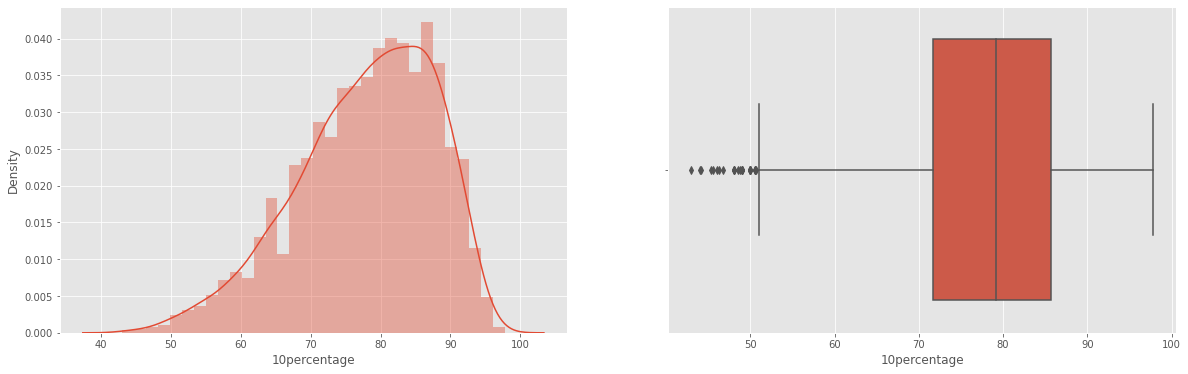

In [ ]:
visualize(df1['10percentage'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is around **80 percent** we verify these assumptions later on

In [ ]:
print(outlier(df1['10percentage']))
print(df1['10percentage'].median())

 outliers for given column  are: [50.6, 44.16, 44.0, 45.6, 48.0, 49.0, 48.0, 49.0, 48.8, 49.0, 49.0, 48.5, 48.0, 50.6, 43.0, 50.0, 49.0, 45.33, 46.24, 48.0, 50.5, 50.0, 50.0, 50.66, 46.8, 50.0, 50.0, 50.0, 46.0, 49.9]
None
79.15


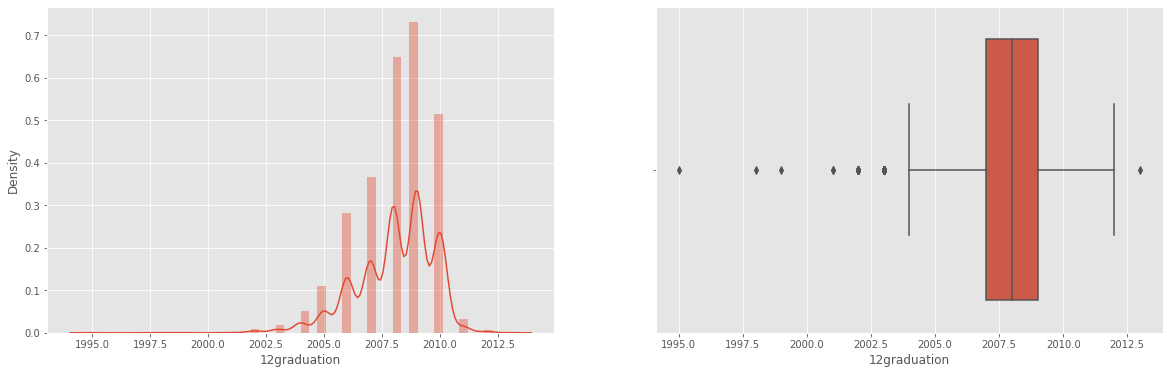

In [ ]:
visualize(df1['12graduation'])


**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is between **2007.5 and 2010.0** we verify these assumptions later on

In [ ]:
print(outlier(df1['12graduation']))
print(df1['12graduation'].median())

 outliers for given column  are: [1995, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2002, 2001, 2002, 2003, 2003, 2002, 2002, 1998, 2003, 2013, 2001, 2003, 2003, 2003, 2003, 2003, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 1999, 2002, 2003, 2003, 2002, 2003, 2002, 2003, 2002, 2002, 2003, 2002]
None
2008.0


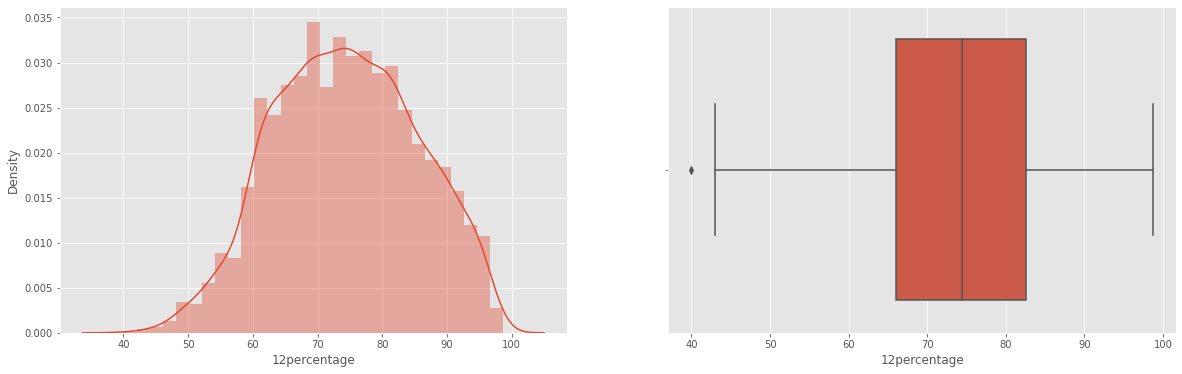

In [ ]:
visualize(df1['12percentage'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is close to **70 percent** we verify these assumptions later on

In [ ]:
print(outlier(df1['12percentage']))
print(df1['12percentage'].median())

 outliers for given column  are: [40.0]
None
74.4


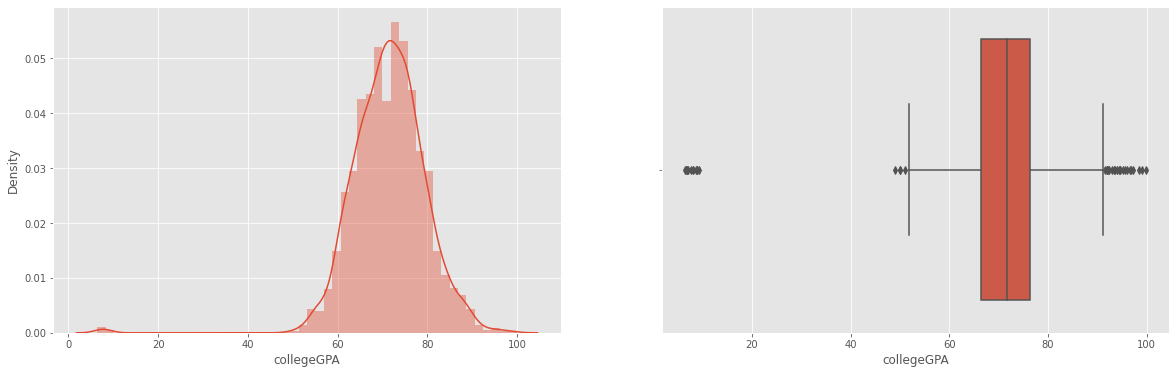

In [ ]:
visualize(df1['collegeGPA'])

**Observations**
we can see the *outliers* are present below the **lower limit and upper limit** from the boxplot and from distplot we can observe the *medain* is around **70 percent** we verify these assumptions later on

In [ ]:
print(outlier(df1['collegeGPA']))
print(df1['collegeGPA'].median())

 outliers for given column  are: [8.58, 92.1, 6.63, 93.0, 92.0, 93.6, 99.93, 6.8, 94.5, 50.0, 92.3, 96.0, 97.3, 93.3, 6.85, 8.07, 96.7, 94.7, 7.56, 6.95, 95.3, 8.13, 9.3, 92.0, 8.88, 8.89, 94.0, 49.07, 92.0, 94.6, 98.4, 95.7, 51.0, 6.45, 96.9, 50.0, 91.6, 99.0]
None
71.72


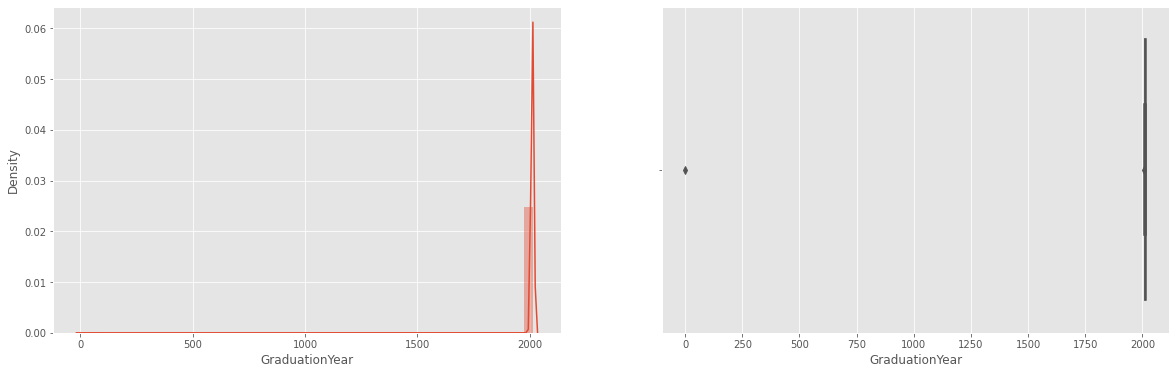

In [ ]:
visualize(df['GraduationYear'])

**Observations**
we can see the *outliers* are not present below th from the boxplot and from distplot we can observe the *medain* is around **2013** we verify these assumptions later on

In [ ]:
print(outlier(df1['GraduationYear']))
print(df1['GraduationYear'].median())

 outliers for given column  are: [0, 2007]
None
2013.0


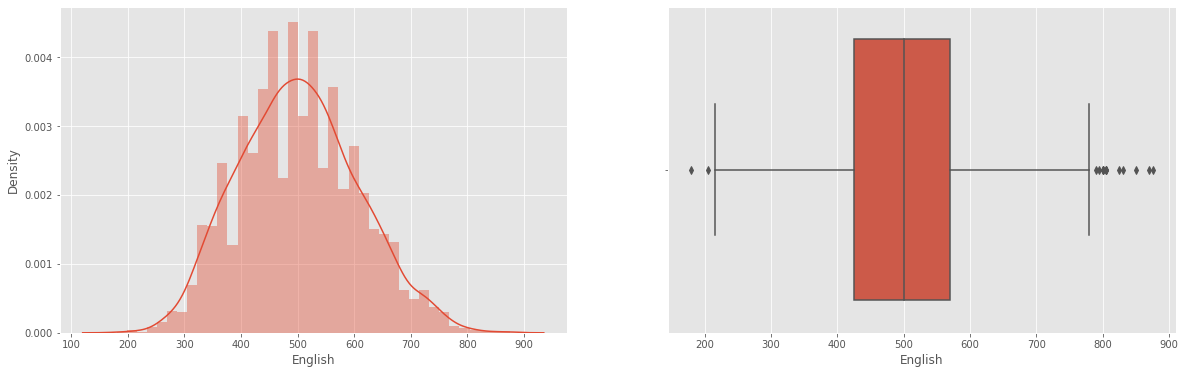

In [ ]:
visualize(df1['English'])

**Observations**
we can see the *outliers* are present below the **lower limit and upper limit** from the boxplot and from distplot we can observe the *medain* is between **400 and 600** we verify these assumptions later on

In [ ]:
print(outlier(df1['English']))
print(df['English'].median())

 outliers for given column  are: [875, 825, 870, 790, 800, 205, 805, 180, 830, 795, 800, 800, 805, 805, 850]
None
500.0


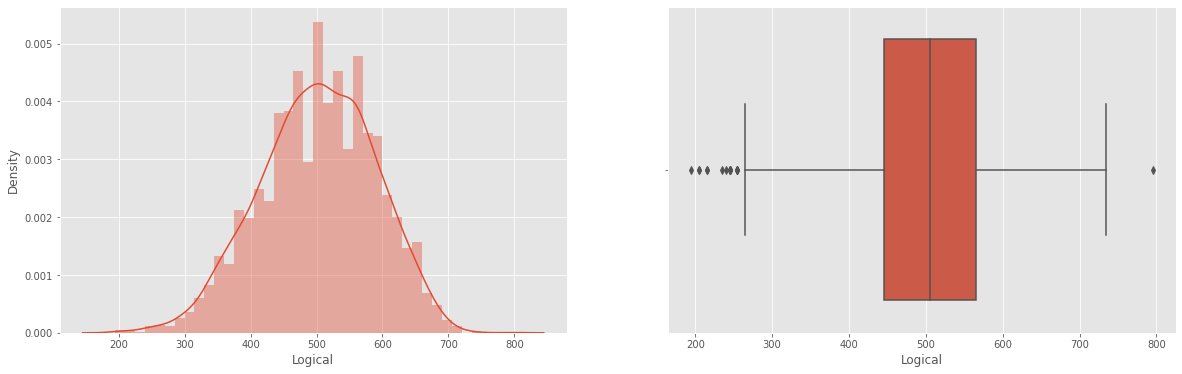

In [ ]:
visualize(df['Logical'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is between **500 and 600** we verify these assumptions later on

In [ ]:
print(outlier(df1['Logical']))
print(df1['Logical'].median())

 outliers for given column  are: [255, 205, 245, 215, 215, 795, 255, 245, 255, 255, 240, 195, 245, 245, 245, 205, 235, 245]
None
505.0


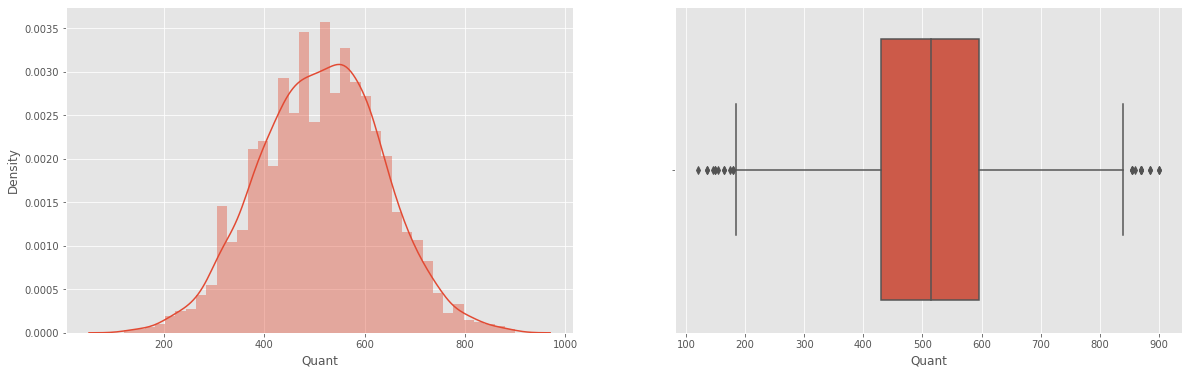

In [ ]:
visualize(df1['Quant'])

**Observations**
we can see the *outliers* are present below the **lower limit and upper limit** from the boxplot and from distplot we can observe the *medain* is between **400 and 600** we verify these assumptions later on

In [ ]:
print(outlier(df1['Quant']))
print(df1['Quant'].median())

 outliers for given column  are: [870, 165, 180, 860, 180, 870, 175, 870, 870, 135, 855, 145, 870, 885, 120, 900, 135, 165, 900, 885, 855, 855, 150, 150, 155]
None
515.0


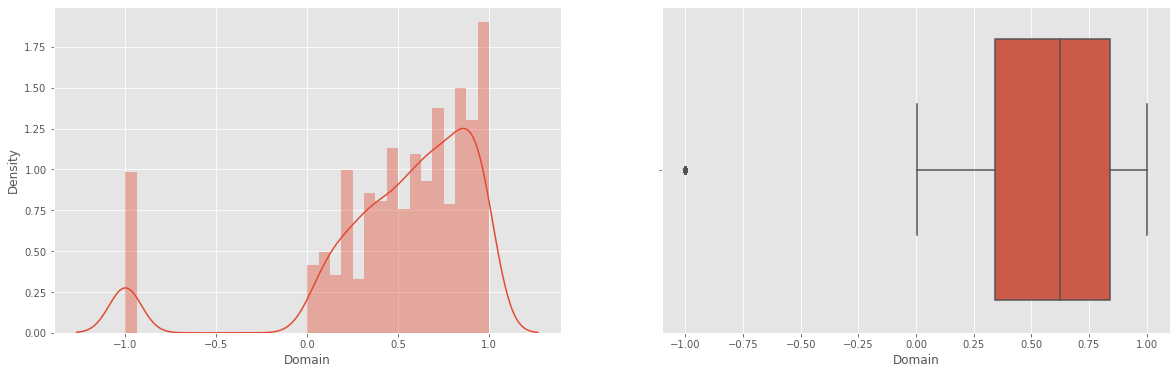

In [ ]:
visualize(df['Domain'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is between **0.5 and 1.0** we verify these assumptions later on

In [ ]:
print(outlier(df1['Domain']))
print(df1['Domain'].median())

 outliers for given column  are: [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 

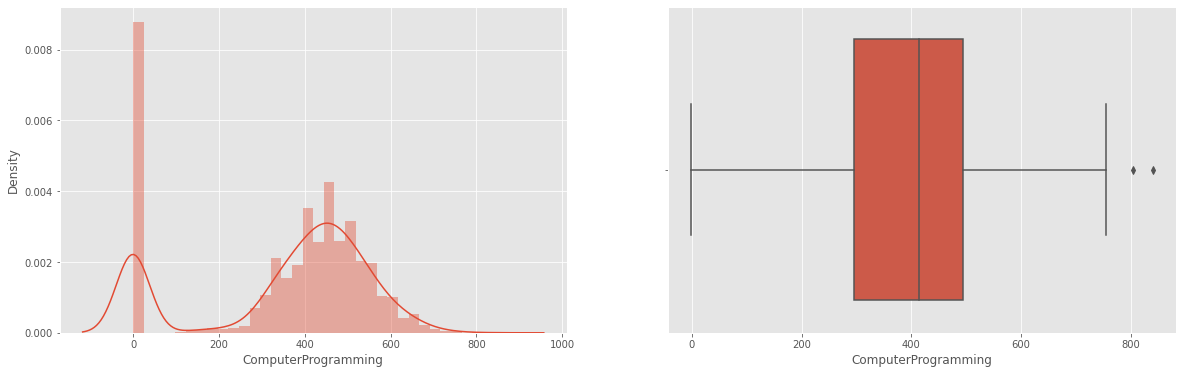

In [ ]:
visualize(df1['ComputerProgramming'])

**Observations**
we can see the *outliers* are not present below the  from the boxplot and from distplot we can observe the *medain* is between **400 and 600** we verify these assumptions later on

In [ ]:
print(outlier(df1['ComputerProgramming']))
print(df1['ComputerProgramming'].median())

 outliers for given column  are: [804, 840]
None
415.0


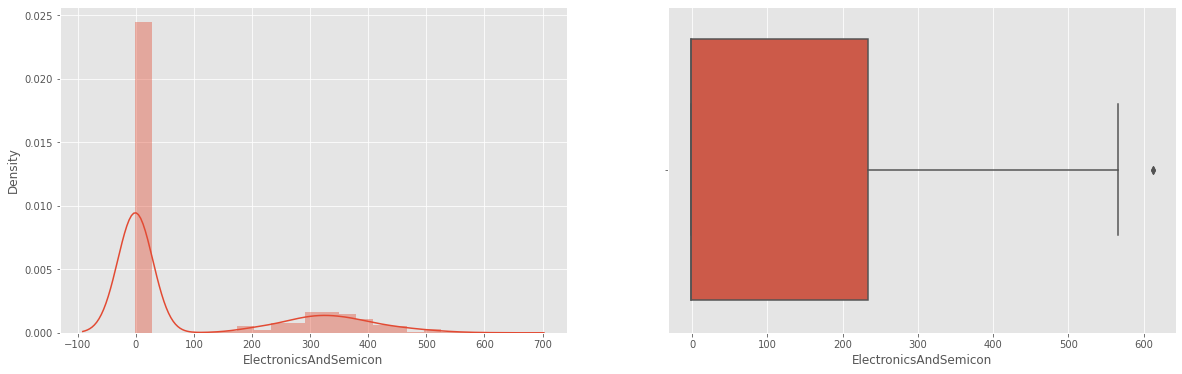

In [ ]:
visualize(df1['ElectronicsAndSemicon'])

**Observations**
we can see the *outliers* are no present below the  from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['ElectronicsAndSemicon']))
print(df1['ElectronicsAndSemicon'].median())

 outliers for given column  are: [612, 612]
None
-1.0


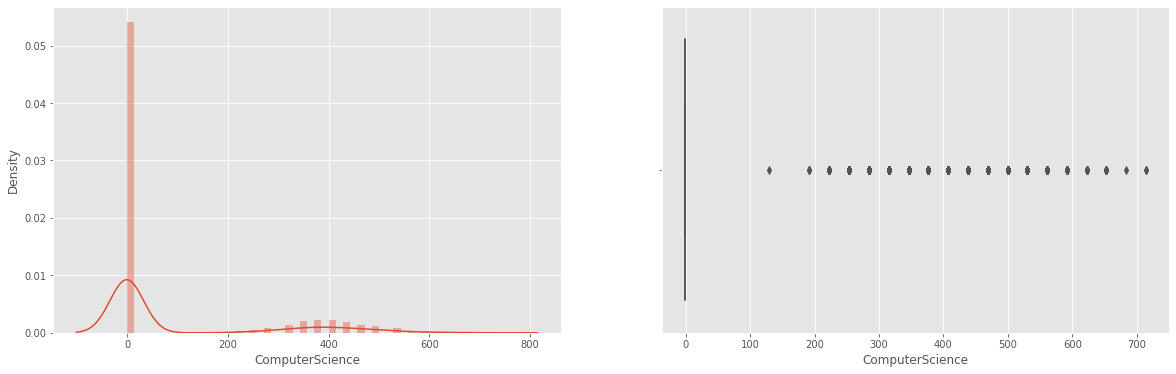

In [ ]:
visualize(df1['ComputerScience'])


**Observations**
we can see the *outliers* are present below the **upper limit limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['ComputerScience']))
print(df1['ComputerScience'].median())

 outliers for given column  are: [407, 346, 376, 500, 346, 438, 376, 407, 500, 346, 346, 315, 253, 346, 376, 346, 500, 469, 192, 530, 438, 469, 500, 346, 438, 315, 500, 346, 407, 315, 284, 284, 438, 253, 469, 284, 346, 438, 376, 530, 223, 376, 376, 500, 407, 376, 469, 376, 438, 561, 315, 407, 407, 376, 376, 438, 407, 315, 407, 315, 407, 530, 407, 407, 438, 469, 376, 407, 376, 438, 561, 561, 407, 684, 438, 315, 407, 500, 376, 346, 438, 407, 315, 346, 407, 284, 438, 223, 376, 530, 407, 530, 284, 346, 346, 530, 376, 438, 407, 253, 346, 469, 346, 376, 438, 438, 376, 346, 346, 376, 530, 469, 376, 407, 346, 407, 376, 407, 530, 469, 376, 315, 407, 469, 592, 315, 469, 315, 315, 530, 315, 500, 438, 592, 438, 346, 315, 407, 438, 438, 561, 469, 376, 376, 253, 438, 438, 438, 407, 346, 623, 315, 500, 469, 284, 407, 561, 315, 315, 500, 315, 253, 530, 346, 346, 407, 653, 284, 346, 253, 315, 469, 315, 407, 376, 284, 469, 407, 653, 376, 346, 530, 346, 315, 253, 376, 407, 253, 376, 407, 469, 376, 253, 3

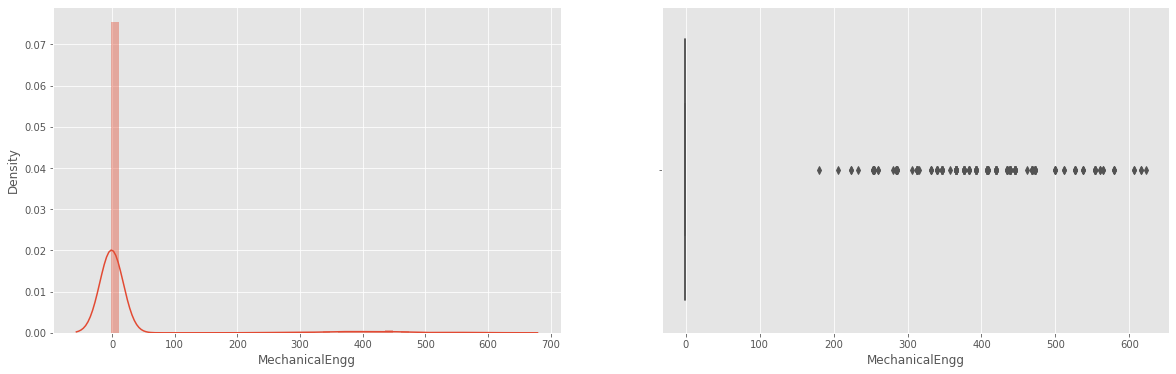

In [ ]:
visualize(df1['MechanicalEngg'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['MechanicalEngg']))
print(df1['MechanicalEngg'].median())

 outliers for given column  are: [469, 313, 286, 253, 366, 446, 206, 438, 446, 332, 393, 366, 253, 383, 286, 393, 260, 438, 561, 553, 446, 376, 313, 526, 376, 313, 553, 284, 469, 409, 366, 409, 366, 473, 340, 223, 420, 383, 538, 346, 393, 286, 393, 553, 438, 538, 435, 438, 512, 407, 469, 580, 366, 393, 280, 366, 366, 393, 435, 340, 473, 438, 469, 358, 512, 313, 366, 500, 473, 407, 446, 313, 446, 366, 420, 260, 580, 393, 340, 420, 473, 383, 313, 332, 340, 315, 254, 473, 553, 469, 446, 223, 376, 376, 366, 332, 553, 438, 553, 438, 616, 564, 407, 438, 420, 233, 306, 313, 383, 446, 253, 253, 435, 538, 438, 420, 409, 616, 346, 407, 366, 286, 407, 346, 393, 346, 393, 553, 473, 473, 553, 393, 313, 564, 420, 500, 461, 346, 420, 180, 393, 376, 393, 366, 420, 473, 435, 526, 500, 420, 376, 366, 383, 313, 340, 446, 438, 346, 376, 346, 407, 407, 407, 366, 438, 366, 446, 446, 313, 376, 286, 376, 438, 435, 500, 606, 376, 407, 420, 606, 313, 446, 420, 376, 526, 409, 346, 313, 446, 469, 446, 420, 313, 5

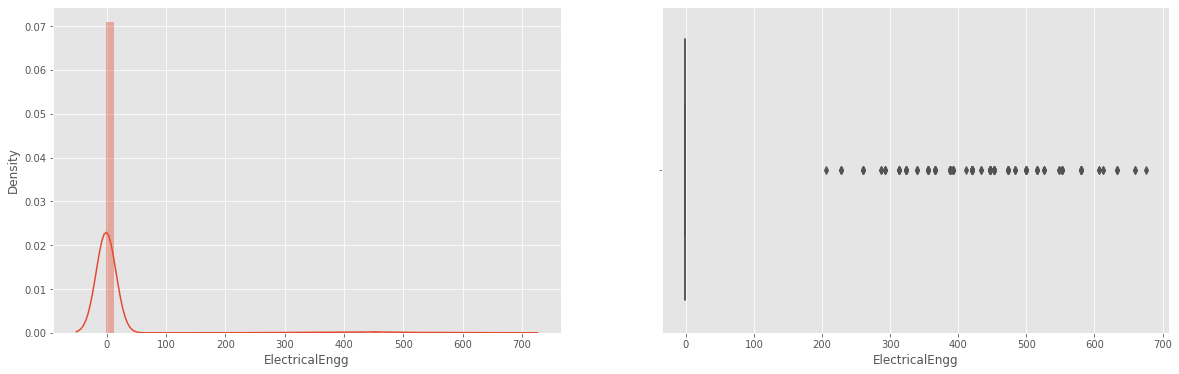

In [ ]:
visualize(df1['ElectricalEngg'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['ElectricalEngg']))
print(df1['ElectricalEngg'].median())

 outliers for given column  are: [484, 606, 393, 500, 553, 580, 446, 446, 446, 446, 420, 324, 393, 388, 356, 313, 633, 388, 516, 356, 366, 420, 612, 580, 388, 452, 452, 324, 446, 388, 553, 500, 526, 420, 324, 446, 452, 452, 548, 516, 388, 228, 516, 500, 393, 324, 433, 553, 526, 633, 473, 473, 388, 420, 420, 420, 580, 553, 356, 526, 676, 228, 292, 660, 446, 452, 433, 411, 393, 612, 388, 473, 286, 420, 484, 446, 420, 420, 452, 324, 446, 340, 313, 446, 388, 473, 356, 324, 580, 366, 366, 446, 286, 366, 313, 452, 292, 473, 388, 393, 366, 260, 340, 260, 356, 356, 324, 260, 500, 356, 500, 452, 388, 516, 473, 452, 292, 420, 580, 206, 420, 313, 548, 446, 313, 553, 340, 473, 633, 484, 356, 313, 500, 420, 260, 500, 366, 420, 228, 580, 580, 516, 446, 292, 500, 420, 473, 393, 553, 473, 446, 420, 393, 420, 452, 473, 660, 356, 366, 606, 580]
None
-1.0


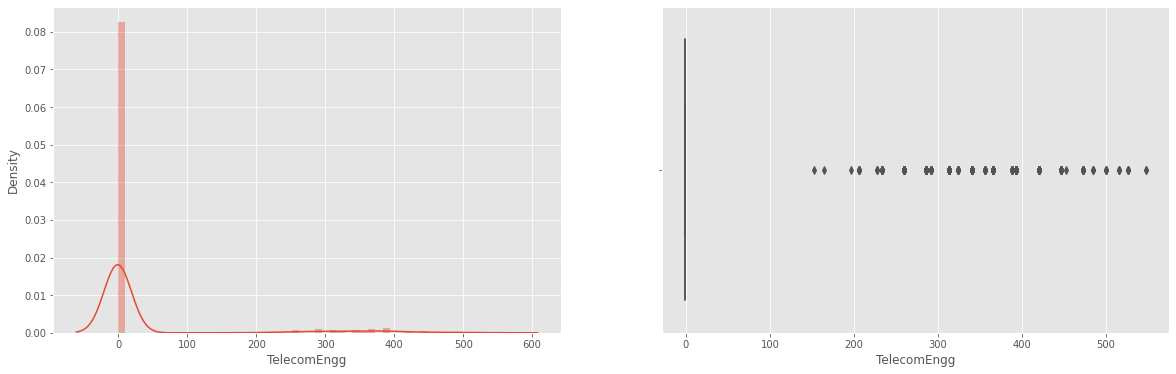

In [ ]:
visualize(df1['TelecomEngg'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['TelecomEngg']))
print(df1['TelecomEngg'].median())

 outliers for given column  are: [206, 313, 420, 260, 393, 260, 393, 366, 260, 313, 313, 446, 206, 324, 340, 340, 340, 260, 446, 286, 286, 446, 340, 366, 366, 393, 473, 393, 340, 484, 420, 484, 366, 286, 366, 452, 260, 286, 393, 286, 260, 313, 366, 340, 233, 366, 286, 292, 286, 393, 292, 340, 526, 484, 153, 340, 260, 233, 526, 286, 516, 324, 313, 420, 286, 260, 292, 340, 313, 366, 356, 420, 420, 260, 292, 393, 393, 548, 366, 420, 340, 260, 366, 446, 446, 340, 233, 228, 420, 292, 393, 286, 393, 420, 393, 233, 393, 286, 260, 548, 473, 473, 366, 340, 313, 260, 233, 446, 260, 366, 313, 196, 340, 313, 366, 393, 340, 366, 393, 260, 393, 324, 356, 393, 366, 420, 260, 313, 366, 164, 473, 292, 340, 356, 233, 393, 313, 388, 516, 366, 286, 366, 420, 500, 260, 484, 473, 446, 473, 340, 324, 366, 313, 446, 313, 206, 260, 260, 473, 324, 340, 366, 393, 286, 340, 366, 473, 366, 420, 313, 286, 292, 420, 313, 393, 366, 313, 356, 292, 313, 473, 366, 356, 340, 286, 366, 324, 340, 286, 393, 286, 393, 388, 3

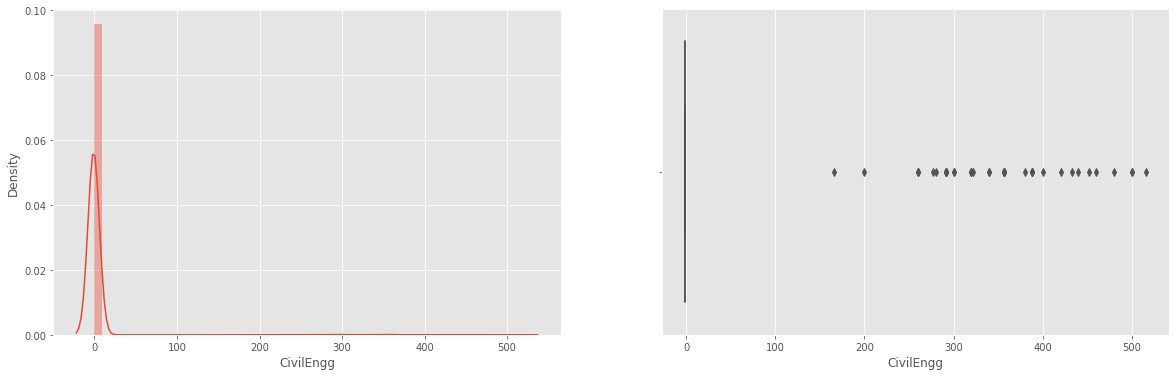

In [ ]:
visualize(df1['CivilEngg'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['CivilEngg']))
print(df1['CivilEngg'].median())

 outliers for given column  are: [320, 400, 388, 320, 260, 440, 356, 356, 292, 500, 200, 300, 388, 500, 452, 322, 340, 260, 260, 166, 388, 277, 356, 356, 516, 380, 292, 320, 356, 433, 292, 300, 356, 292, 280, 340, 420, 292, 388, 292, 460, 480]
None
-1.0


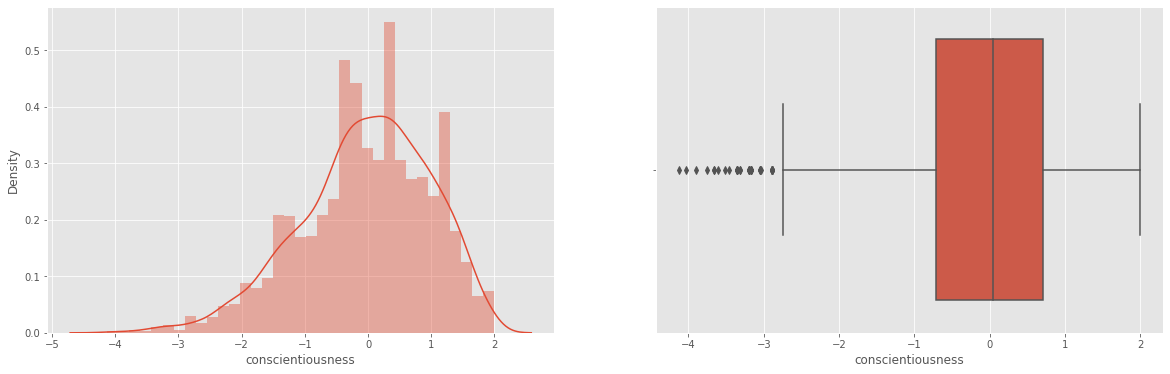

In [ ]:
visualize(df1['conscientiousness'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['conscientiousness']))
print(df1['conscientiousness'].median())

 outliers for given column  are: [-3.1994, -2.8879, -3.1994, -3.6631, -3.6060000000000003, -3.3539, -3.3539, -3.3188, -2.8879, -3.1752, -3.4624, -3.0448, -3.1752, -3.3539, -3.6631, -2.8903, -3.1994, -3.1994, -4.1267, -3.3539, -2.8903, -2.8879, -2.8879, -2.8879, -3.3539, -3.1752, -3.8933, -3.1752, -3.5085, -2.8903, -3.7496, -3.0448, -4.0369, -3.1752, -3.0315, -3.3188, -3.1994, -2.8903, -3.0448]
None
0.0464


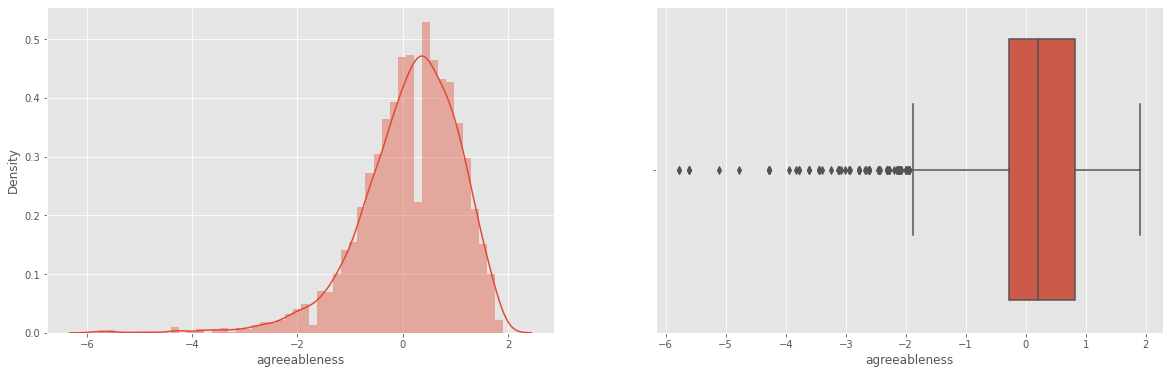

In [ ]:
visualize(df1['agreeableness'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['agreeableness']))
print(df1['agreeableness'].median())

 outliers for given column  are: [-2.1186, -2.4516, -2.6847, -3.7836, -2.1186, -4.2831, -1.9953, -2.9314, -1.9521, -5.6151, -1.9521, -2.4633, -2.6193, -2.4516, -5.1156, -1.9953, -2.1186, -1.9521, -1.9521, -1.9521, -2.1903, -1.9953, -3.6171, -1.9521, -2.6181, -2.7754, -2.1513, -2.2851, -2.3073, -3.4506, -3.0874, -2.4516, -5.7816, -1.9521, -2.1186, -4.2831, -4.2831, -2.3073, -2.2851, -2.4516, -3.1176, -2.2851, -3.7836, -2.6193, -1.9521, -3.1176, -2.1186, -2.1186, -2.1186, -2.1513, -2.2851, -1.9521, -1.9521, -2.1186, -2.6193, -1.9521, -2.1186, -3.1264, -3.0094, -2.1513, -2.1513, -3.6171, -3.6171, -1.9521, -3.4506, -3.4506, -2.6181, -2.0733, -2.7754, -3.9501, -2.3073, -2.9511, -2.3073, -4.2831, -4.7826, -2.1513, -1.9953, -2.3073, -1.9521, -3.8284, -2.6193, -2.7846, -2.4516, -1.9953, -2.4516, -2.7754, -2.7846, -1.9953, -2.0733, -2.7754, -2.2851, -2.4516, -3.2434, -2.9511, -5.6151, -2.6181, -2.3073, -1.9953, -2.7754, -3.1176, -2.2851, -3.4506, -4.2831, -1.9953, -2.1186, -5.6151, -3.7836, -2.

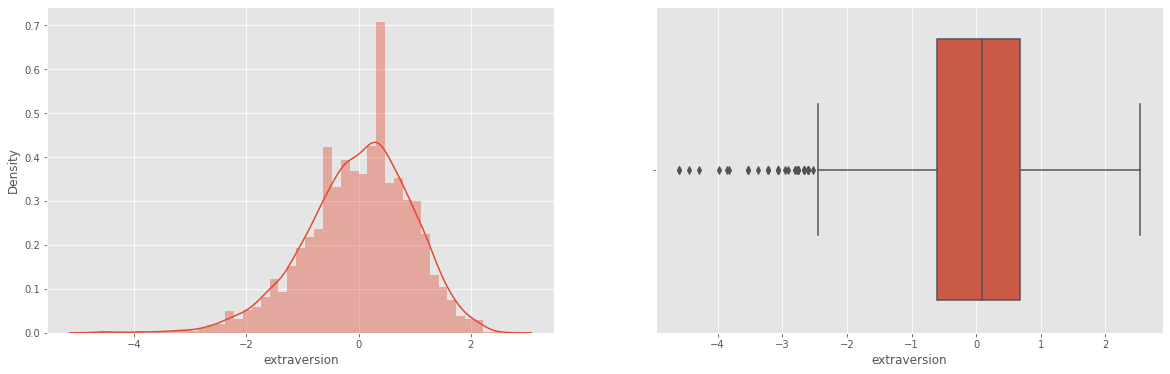

In [ ]:
visualize(df1['extraversion'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['extraversion']))
print(df1['extraversion'].median())

 outliers for given column  are: [-2.6028, -3.2176, -4.6009, -3.525, -3.0639, -3.2176, -2.775, -2.6662, -4.6009, -2.6028, -2.9565, -4.2935, -3.0639, -2.7565, -3.537, -3.525, -2.6662, -2.7565, -2.7565, -3.8636, -3.0639, -2.7565, -2.9102, -3.2176, -3.2176, -3.3713, -2.6662, -3.9861, -2.6662, -2.521, -2.8113, -2.8113, -3.0639, -2.6028, -3.8324, -2.6028, -2.6028, -2.6028, -4.4472, -2.6028]
None
0.0914


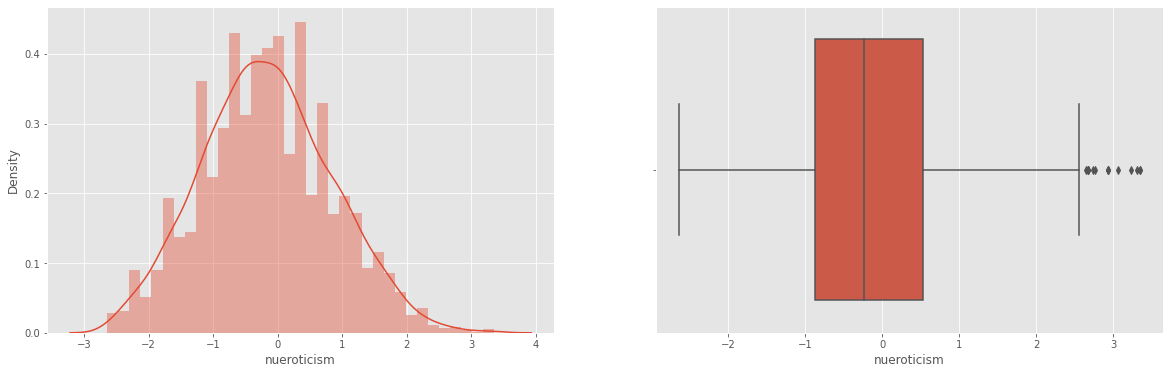

In [ ]:
visualize(df1['nueroticism'])

**Observations**
we can see the *outliers* are present below the **upper limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['nueroticism']))
print(df1['nueroticism'].median())

 outliers for given column  are: [2.6475, 2.9349, 3.3525, 3.3525, 3.235, 2.6814, 3.0617, 2.765, 2.7356, 2.9349, 2.6814, 3.3152, 2.6814, 2.6814, 2.9349]
None
-0.2344


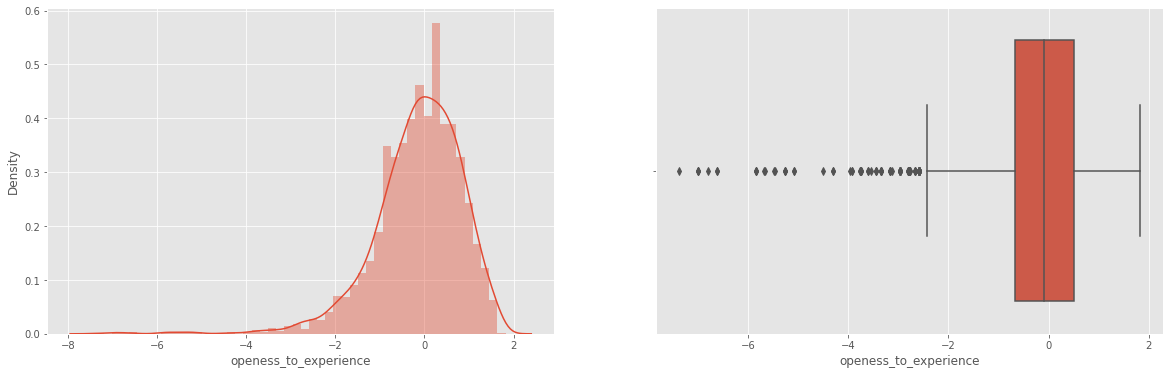

In [ ]:
visualize(df1['openess_to_experience'])

**Observations**
we can see the *outliers* are present below the **lower limit** from the boxplot and from distplot we can observe the *medain* is around **0** we verify these assumptions later on

In [ ]:
print(outlier(df1['openess_to_experience']))
print(df1['openess_to_experience'].median())

 outliers for given column  are: [-2.7769, -5.0763, -3.1602, -5.477, -2.9731, -5.2679, -3.9605, -4.5015, -6.9925, -3.4471, -5.2679, -2.5853, -3.3518, -3.735, -2.9686, -2.5853, -2.5853, -4.3099, -2.5853, -2.7595, -2.5853, -3.4471, -3.735, -2.7769, -6.9925, -2.5853, -3.3518, -5.8428, -2.9686, -2.5853, -2.5853, -2.7595, -3.5434, -3.3518, -6.8009, -2.5853, -2.5853, -2.9686, -3.9266, -3.1602, -2.9686, -2.6572, -2.5853, -2.5853, -3.6051, -3.763, -2.7769, -5.686, -2.6572, -4.3099, -2.5853, -2.9686, -2.8152, -2.6572, -3.4471, -5.6512, -2.8152, -3.1602, -2.7769, -2.7769, -5.4595, -2.6572, -3.3518, -5.8428, -3.1311, -3.763, -2.7769, -3.735, -2.5853, -2.5853, -2.5853, -5.8428, -3.3518, -6.6092, -3.1602, -3.9266, -2.8152, -2.5853, -2.9686, -5.2679, -5.0763, -2.5853, -7.3757, -2.9731, -2.7769, -6.6092, -2.7769, -6.9925, -2.7769, -3.6051, -2.5853, -2.7769, -2.7769, -2.9686, -2.9731]
None
-0.0943


**counting the number of instances for categorical data**

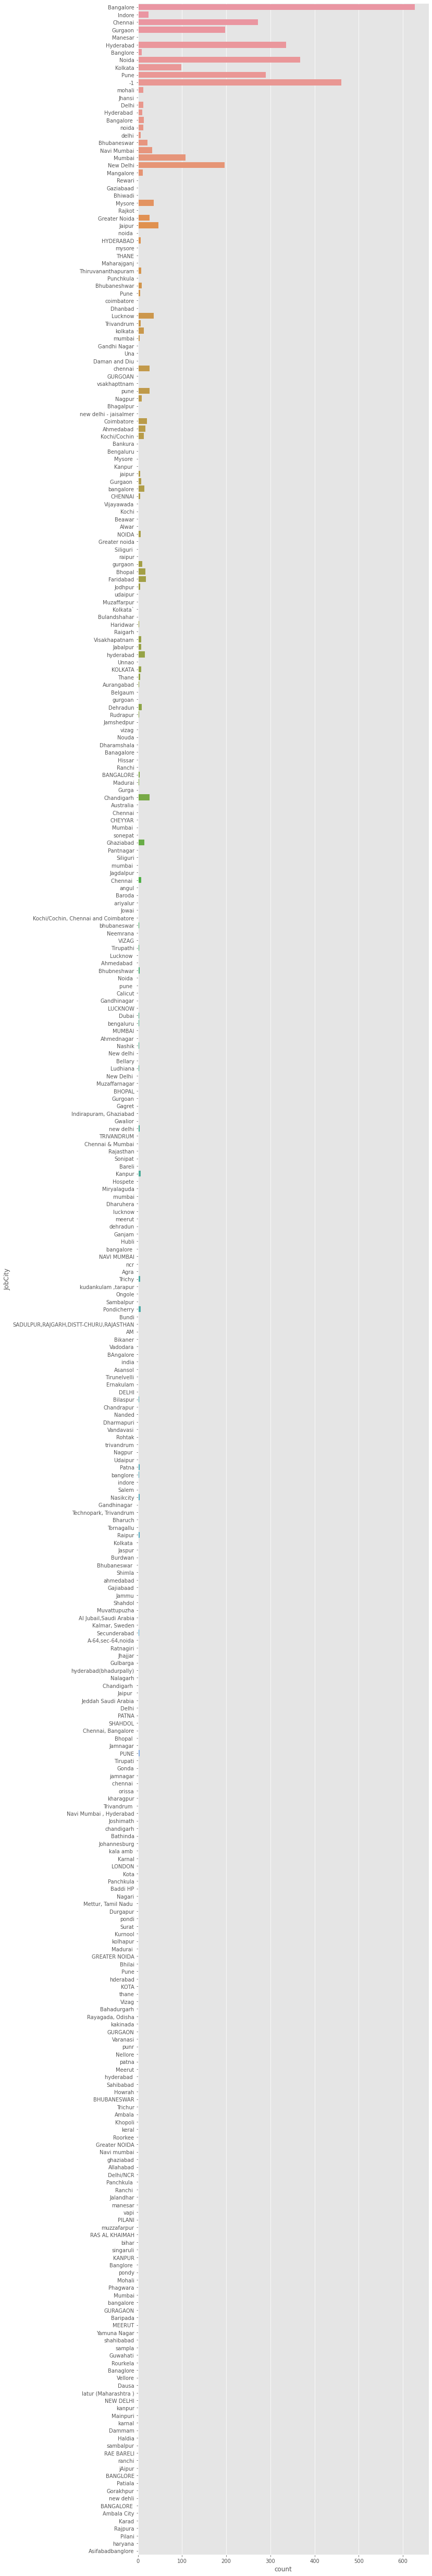

In [ ]:
plt.figure(figsize=(10,90))
sns.countplot(y=df1['JobCity'])

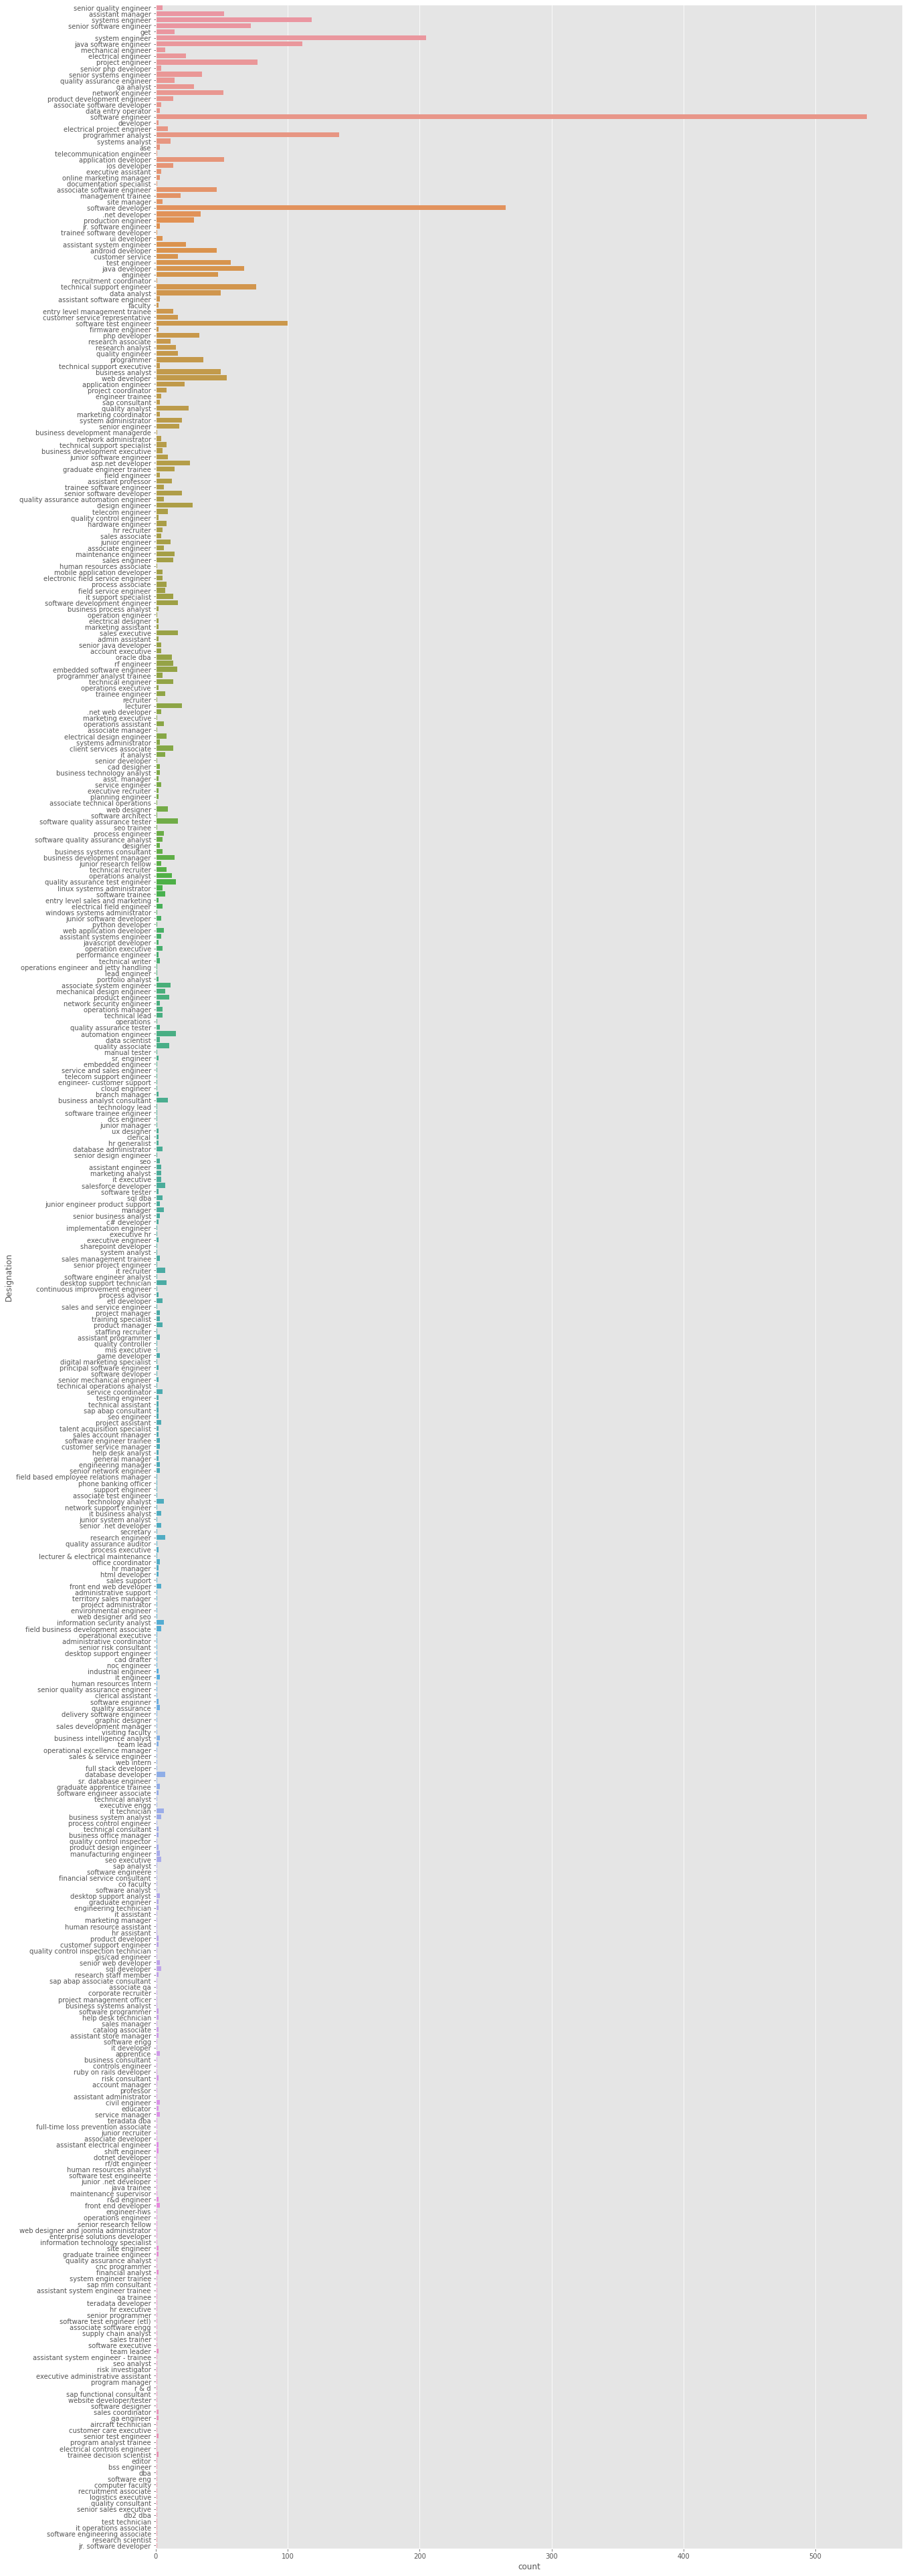

In [ ]:
plt.figure(figsize=(20,70))
sns.countplot(y=df1['Designation'])

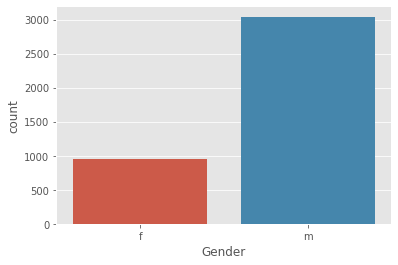

In [ ]:
sns.countplot(df1['Gender'])

### **Bivariant Analysis**

In [ ]:
px.scatter(df1['Salary'],df1['Designation'])

**observations**

for the designation of senior quality engineer the salary variations can be observed which almost consists of all kinds of salaries and moving to the various job designations the salary variations continues decrease and the salaries were seen increasing compared to designations of previous job

In [ ]:
px.scatter(df1['Salary'],df1['JobCity'])

**observations**
for bangalore city we can see all the salary variations later on the salary variations gradually decreased as the cities continues to varied.

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
def Biplots(feature_1,feature_2):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.scatterplot(feature_1,feature_2)
    plt.subplot(1,2,2)
    plt.hexbin(feature_1,feature_2)
    plt.figure(figsize=(20,10))
    sns.swarmplot(feature_1,feature_2)

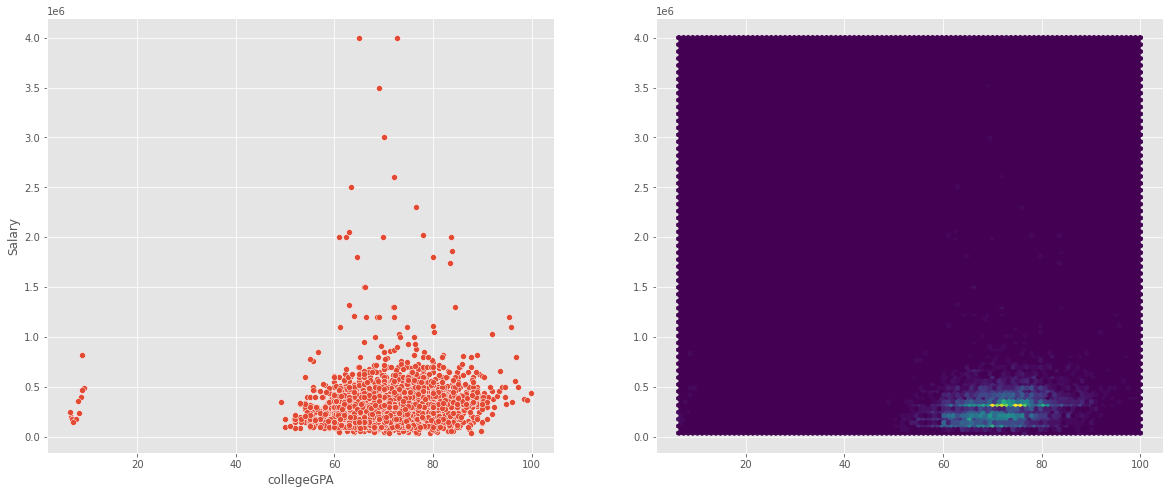

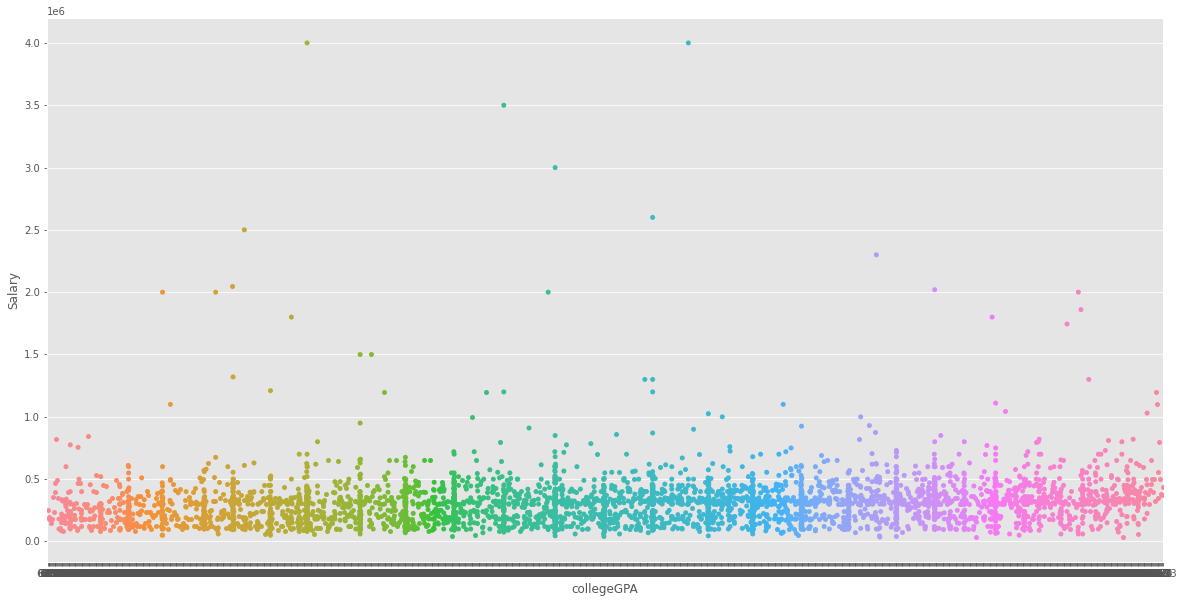

In [ ]:
Biplots(df1['collegeGPA'],df1['Salary'])

**observations**

We can observe that the salary is expected to given to the students whose percetnage is likely greater than 50 percent and reached maximum salary between 60 and 80 percentage in collegeGPA

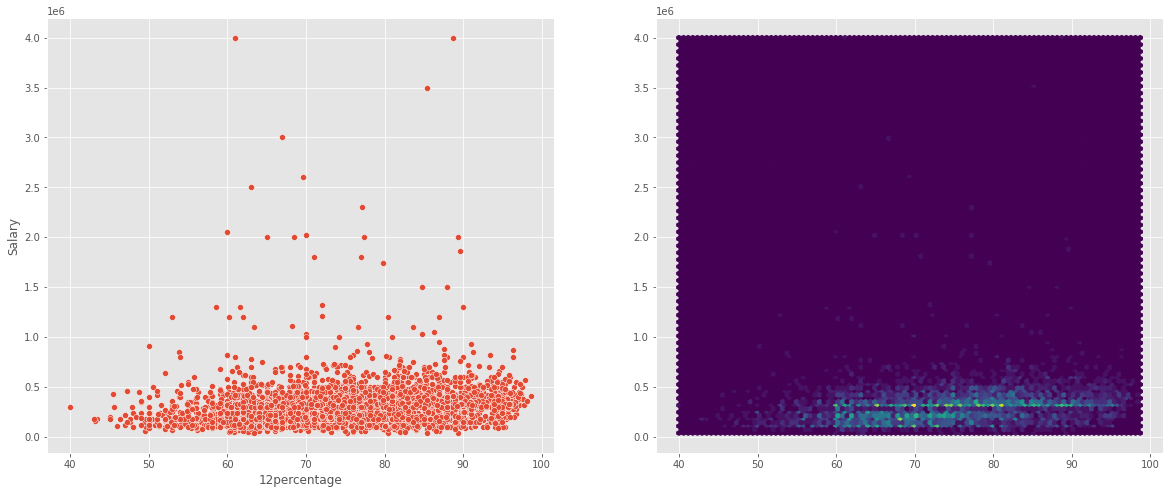

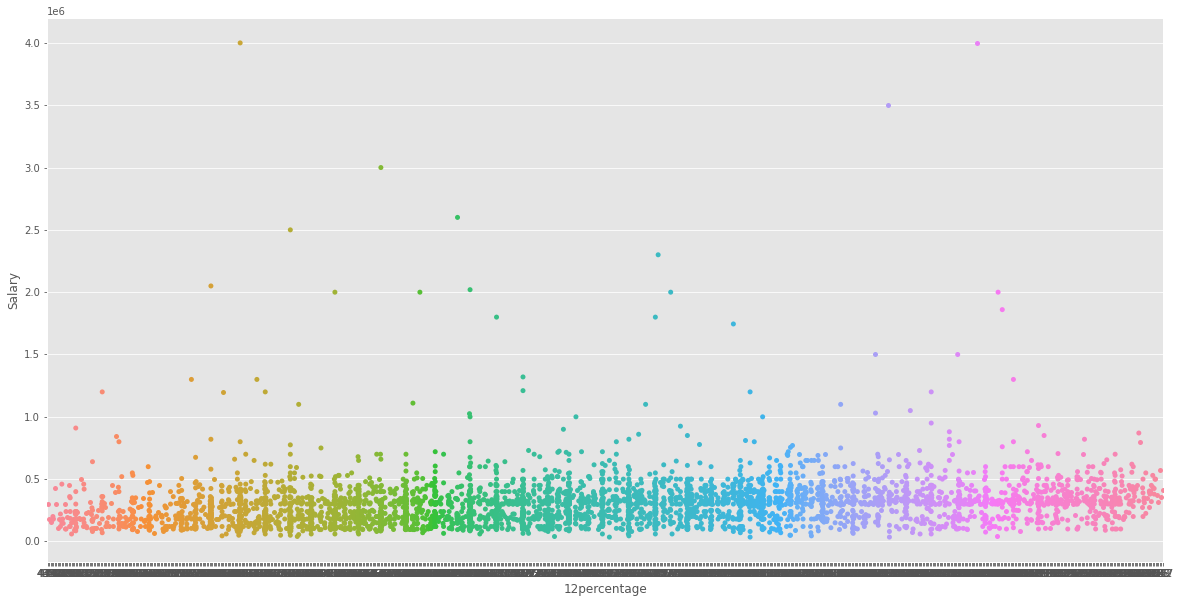

In [ ]:
Biplots(df1['12percentage'],df1['Salary'])

In [ ]:

df2 = df1[df1.Specialization == 'computer science & engineering']
print(df1.shape)
print(df2.shape)       ##so there are 744 fields where the job specilzation is computer science & engineering

(3998, 38)
(744, 38)


In [ ]:
job_role = ['software engineer','programmer analyst','associate engineer','hardware engineer']

In [ ]:
df2

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
6,947847,300000.0,8/1/2014 0:00,5/1/2015 0:00,java software engineer,Banglore,m,2/1/1993 0:00,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
18,711342,120000.0,1/1/2014 0:00,6/1/2014 0:00,data entry operator,Gurgaon,m,12/7/1992 0:00,65.00,state board,2008,64.80,icse,184,2,B.Tech/B.E.,computer science & engineering,69.54,184,0,Uttar Pradesh,2013,465,495,515,0.563268,425,-1,-1,-1,-1,-1,-1,-0.1590,0.3789,1.3933,-0.2344,1.4386
24,963123,335000.0,6/1/2014 0:00,6/1/2015 0:00,programmer analyst,Hyderabad,m,6/28/1993 0:00,88.00,state board,2010,90.00,state board,9173,2,B.Tech/B.E.,computer science & engineering,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692
25,350211,435000.0,9/1/2012 0:00,present,systems analyst,Gurgaon,f,3/2/1991 0:00,86.80,cbse,2008,82.80,cbse,9019,2,B.Tech/B.E.,computer science & engineering,78.00,9019,0,Haryana,2012,575,585,575,0.744758,565,-1,438,-1,-1,-1,-1,0.0464,1.2028,-0.9245,0.5323,-0.2875
31,1094324,340000.0,8/1/2014 0:00,4/1/2015 0:00,software engineer,Bangalore,m,10/23/1992 0:00,77.20,state board,2010,86.10,state board,7282,2,B.Tech/B.E.,computer science & engineering,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,1233826,330000.0,6/1/2015 0:00,present,technical engineer,pune,m,1/24/1993 0:00,76.00,state board,2009,89.80,state board,272,2,B.Tech/B.E.,computer science & engineering,62.00,272,0,Punjab,2015,595,530,630,-1.000000,-1,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.0100,-0.2344,0.8637
3975,1240207,300000.0,7/1/2014 0:00,4/1/2015 0:00,game developer,Noida,m,6/3/1991 0:00,86.00,cbse,2009,76.00,cbse,13210,2,B.Tech/B.E.,computer science & engineering,63.00,13210,0,Uttar Pradesh,2014,720,455,535,0.968237,605,-1,-1,-1,-1,-1,-1,0.5591,0.5454,0.1637,0.3995,0.4805
3981,1077872,220000.0,9/1/2014 0:00,present,software engineer,Gurgaon,m,12/17/1991 0:00,53.40,cbse,2009,65.40,cbse,3879,2,B.Tech/B.E.,computer science & engineering,71.20,3879,0,Madhya Pradesh,2013,560,420,645,0.953900,575,-1,530,-1,-1,-1,-1,0.1282,-0.2871,-0.1437,-1.1218,1.4386
3989,1204604,300000.0,9/1/2014 0:00,present,software engineer,Bangalore,m,11/23/1991 0:00,74.88,state board,2010,82.55,state board,3572,2,B.Tech/B.E.,computer science & engineering,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.0333,0.6721


In [ ]:
df_jobs = df1[df1['Designation'].isin(job_role)]
df_jobs['Designation'].value_counts()

software engineer     539
programmer analyst    139
hardware engineer       8
associate engineer      6
Name: Designation, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f0e442baa50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0e442d0a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e442cea90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e442ce550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0e442baf90>,
  <matplotlib.lines.Line2D at 0x7f0e442d0510>]}

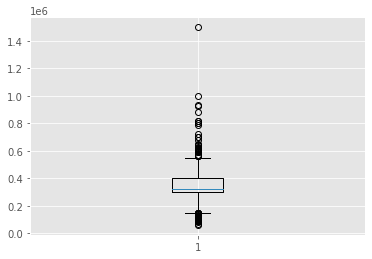

In [ ]:
plt.boxplot(df_jobs['Salary'],)

In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [ ]:
df2.Gender.value_counts()

m    561
f    183
Name: Gender, dtype: int64

In [ ]:
pd.crosstab(df1.Specialization, df1.Gender, margins=True)

Gender,f,m,All
Specialization,,,
aeronautical engineering,1,2,3
applied electronics and instrumentation,2,7,9
automobile/automotive engineering,0,5,5
biomedical engineering,2,0,2
biotechnology,9,6,15
ceramic engineering,0,1,1
chemical engineering,1,8,9
civil engineering,6,23,29
computer and communication engineering,0,1,1


In [ ]:
observed = pd.crosstab(df1.Specialization, df1.Gender)

In [ ]:
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [ ]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df2 = chi2_contingency(observed)[2]

In [ ]:
confidence_level = 0.90

alpha_1 = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha_1,df2)

chi2_critical

57.50530474499599

In [ ]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Reject Null Hypothesis


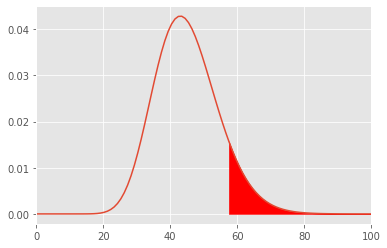

In [ ]:

x_min = 0
x_max = 100
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df2)
plt.xlim(x_min, x_max)
plt.plot(x, y)
chi2_critical_right = chi2_critical
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df2)
plt.fill_between(x1, y1, color='red')